# Imports

In [1]:
import cv2 as cv
from utils import find_biggest_contour,show_images,wrapped_paper,cropp_box_image,replace_image_with_white,finall_extract,correct_id_mcq,correct_id,split_questions
import numpy as np

In [2]:
width=480
height=480
borders=30

# Read Image

In [3]:
path=input("Enter the path of the image")
image=cv.resize(cv.imread(path),(width,height))

# Preprocessing

## 1-Get the edges

In [4]:
gray=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
blur=cv.GaussianBlur(gray,(5,5),1)
edged = cv.Canny(blur,75, 100)

## 2-Get the contours


In [5]:
edge_copy=edged.copy()
contours, hierarchy = cv.findContours(edge_copy, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
image_color = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)
cv.drawContours(image_color, contours, -1, (0, 255, 0), 10)
print("")

## 3-Get the paper

In [6]:
biggest,max_area=find_biggest_contour(contours)

In [7]:
wrapped_paper_image=wrapped_paper(width,height,biggest,blur)
wrapped_paper_gray=wrapped_paper(width,height,biggest,gray)


## 4-Thresold

In [8]:
adaptive_thresh = cv.adaptiveThreshold(
    wrapped_paper_image, 
    255, 
    cv.ADAPTIVE_THRESH_GAUSSIAN_C,  # Use Gaussian weights for neighborhood
    cv.THRESH_BINARY, 
    11,  # Block size (neighborhood size)
    2   # Constant subtracted from the mean
)


## 4-Remove impluse Noise

In [9]:

# Step 4: Replace noise with white patches
contours, _ = cv.findContours(adaptive_thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
output = adaptive_thresh.copy()
replace_image_with_white(contours,output,  30)
   

## 6-Extract Box

In [10]:

actual_box_addative,actual_box_gray=cropp_box_image(output,width,height,wrapped_paper_gray)
cv.imshow("1 Contours", actual_box_gray)
cv.waitKey(0)
cv.destroyAllWindows()


## 7-Remove Name section

In [11]:
mcq_regions,id,name=finall_extract(actual_box_addative,actual_box_gray)

67
69
68


## Correction 

In [12]:
correct_id(id)

74


In [15]:
answers=[]
print(mcq_regions[0].shape)
split_questions(mcq_regions[0])

(256, 68)
anser 2
anser 4
anser 2
anser 3
anser 4
anser 4
anser 4
anser 4
anser 3
anser 4
anser 4
anser 4
anser 4
anser 3


[array([[207, 208, 207, 207, 205, 204, 203, 200, 201, 204, 205, 203, 203,
         204, 204, 205, 207, 207, 207, 207, 209, 205, 204, 204, 205, 206,
         205, 204, 204, 204, 205, 205, 206, 206, 207, 204, 203, 206, 205,
         204, 205, 208, 204, 207, 205, 205, 207, 208, 206, 206, 206, 204,
         206, 207, 207, 206, 209, 208, 206, 205, 206, 205],
        [206, 207, 207, 209, 208, 208, 211, 203, 201, 202, 203, 208, 207,
         204, 204, 208, 203, 203, 204, 205, 212, 210, 208, 207, 207, 205,
         204, 204, 204, 204, 205, 205, 206, 206, 209, 205, 203, 205, 206,
         204, 204, 205, 202, 204, 206, 206, 204, 204, 206, 207, 208, 211,
         205, 206, 209, 207, 205, 204, 206, 205, 205, 208],
        [198, 177, 156, 145, 145, 145, 136, 158, 186, 202, 205, 205, 206,
         206, 204, 204, 205, 204, 189, 163, 141, 142, 137, 131, 147, 184,
         200, 205, 204, 204, 205, 205, 206, 206, 210, 195, 165, 132, 125,
         128, 132, 147, 184, 198, 202, 203, 206, 203, 202, 205, 21

# Show Image

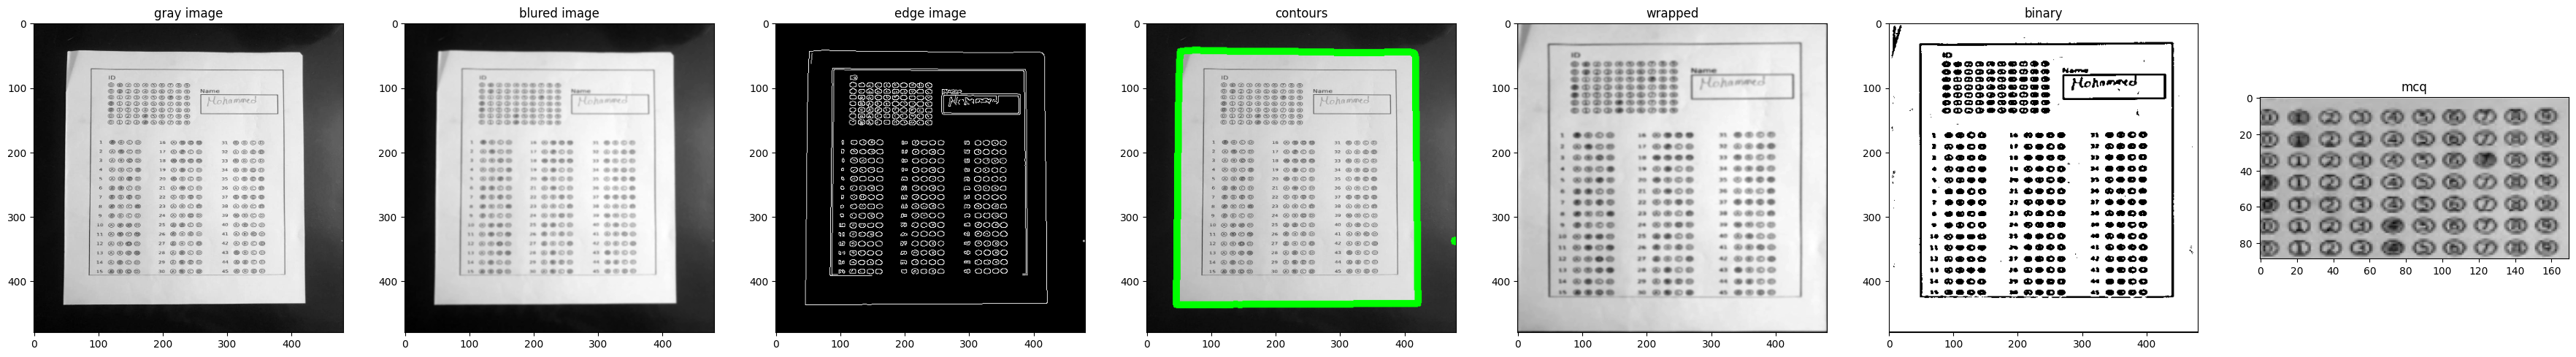

In [14]:
show_images([gray,blur,edged,image_color,wrapped_paper_image,adaptive_thresh,id],["gray image","blured image","edge image","contours","wrapped","binary","mcq"])